raices sucesivas de 10 con 6 cifras 
sqrt^1(10) ≈ 3.16228
sqrt^2(10) ≈ 1.77828
sqrt^3(10) ≈ 1.33352
sqrt^4(10) ≈ 1.15478
sqrt^5(10) ≈ 1.07461
n= 1  log10_aprox=0.0000000000  log10_real=0.0000000000  error=0.00e+00
n= 2  log10_aprox=0.2812500000  log10_real=0.3010299957  error=-1.98e-02
n= 3  log10_aprox=0.4687500000  log10_real=0.4771212547  error=-8.37e-03
n= 4  log10_aprox=0.5937500000  log10_real=0.6020599913  error=-8.31e-03
n= 5  log10_aprox=0.6875000000  log10_real=0.6989700043  error=-1.15e-02
n= 6  log10_aprox=0.7500000000  log10_real=0.7781512504  error=-2.82e-02
n= 7  log10_aprox=0.8437500000  log10_real=0.8450980400  error=-1.35e-03
n= 8  log10_aprox=0.8750000000  log10_real=0.9030899870  error=-2.81e-02
n= 9  log10_aprox=0.9375000000  log10_real=0.9542425094  error=-1.67e-02
n=10  log10_aprox=1.0000000000  log10_real=1.0000000000  error=0.00e+00
n=11  log10_aprox=1.0312500000  log10_real=1.0413926852  error=-1.01e-02
n=12  log10_aprox=1.0625000000  log10_real=1.0791812460  

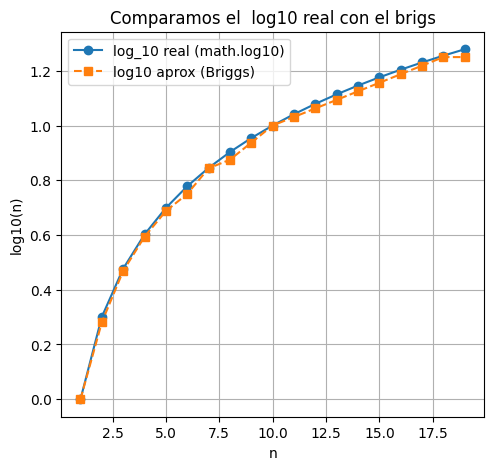

In [15]:
import math
import matplotlib.pyplot as plt

# -funcion para hacer redeondeo a 6 cifras 
def round_sig(x, sig=6):
    if x == 0:
        return 0.0
    return round(x, sig - int(math.floor(math.log10(abs(x)))) - 1)

# - calculo de raices sucecivas 
def compute_briggs_roots(num_roots=5, sig=6):
    roots = []
    value = 10.0
    for i in range(num_roots):
        value = math.sqrt(value)
        value = round_sig(value, sig)
        roots.append(value)
    return roots

briggs_roots = compute_briggs_roots()
print("raices sucesivas de 10 con 6 cifras ")
for i, r in enumerate(briggs_roots, start=1):
    print(f"sqrt^{i}(10) ≈ {r}")

# raices de brigs

def log10_briggs_approx(N, roots, max_levels=None):
   
    if N <= 0:
        raise ValueError("n debe ser un numero positivo")

    m = float(N)
    k = 0
    while m >= 10.0:
        m /= 10.0
        k += 1
    while m < 1.0:
        m *= 10.0
        k -= 1

    if max_levels is None:
        max_levels = len(roots)
        
    log_frac = 0.0

    for i in range(max_levels):
        factor = roots[i]      # aproximamos 
        fraction = 1.0 / (2 ** (i + 1))

        while m >= factor:
            m /= factor
            log_frac += fraction

    return k + log_frac

numeros = list(range(1,20))  

aprox_vals = []
real_vals = []
errores = []

for n in numeros:
    aprox = log10_briggs_approx(n, briggs_roots)
    real = math.log10(n)
    err = aprox - real

    aprox_vals.append(aprox)
    real_vals.append(real)
    errores.append(err)

    print(f"n={n:2d}  log10_aprox={aprox:.10f}  log10_real={real:.10f}  error={err:.2e}")

#  grafica de los logaritmos reales en comparacion con los aproximados 
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(numeros, real_vals, marker='o', label='log_10 real (math.log10)')
plt.plot(numeros, aprox_vals, marker='s', linestyle='--', label='log10 aprox (Briggs)')
plt.xlabel('n')
plt.ylabel('log10(n)')
plt.title('Comparamos el  log10 real con el brigs')
plt.grid(True)
plt.legend()



In [16]:
numeros = list(range(2, 20))

In [17]:
numeros = [1, 2, 3, 4, 5, 6, 6, 7, 8, 9]  